# Properties of Induction Curves

(c) 2017 the authors. This work is licensed under a [Creative Commons Attribution License CC-BY 4.0](https://creativecommons.org/licenses/by/4.0/). All code contained herein is licensed under an [MIT license](https://opensource.org/licenses/MIT).  

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.lines as mlines

import mwc_induction_utils as mwc
mwc.set_plotting_style()

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

Principal properties of induction curves include leakiness, saturation, and dynamic range. Dynamic range describes the difference in fold change between saturation and leakiness values, and quantifies the intensity of the system's response to an input. 

The leakiness is given by the equation

\begin{equation}
\mathrm{leakiness} = \left( 1 + \frac{1}{1 + e^{-\Delta \varepsilon_{AI}}} \frac{R}{N_{NS}} e^{-\Delta \varepsilon_{RA}} \right)^{-1},
\end{equation}

where $\Delta \varepsilon_{AI}$ is the energy difference between the repressor's active and inactive state, $R$ is the number of repressors per cell, $N_{NS}$ is the number of nonspecific binding sites available on the genome (i.e. the length of the genome), and $\Delta \varepsilon_{RA}$ is the operator binding energy. The saturation is given by the equation

\begin{equation}
\mathrm{saturation} = \left( 1 + \frac{1}{1 + e^{-\Delta \varepsilon_{AI}} \left( \frac{K_A}{K_I} \right) ^n} \frac{R}{N_{NS}} e^{-\Delta \varepsilon_{RA}}\right)^{-1}.
\end{equation}

Dynamic range, then, is given by 

\begin{equation}
\mathrm{dynamic~range} = \mathrm{saturation} - \mathrm{leakiness}
\end{equation}

Here we explore how these properties vary with $R$ and $\Delta \varepsilon_{RA}$. 

In [2]:
# Functions for calculating leakiness, saturation, and dynamic range

def leakiness(K_A, K_I, e_AI, R, Op):
    '''
    Computes the leakiness of a simple repression construct
    Parameters
    ----------
    K_A : float
        Dissociation constant for active repressor
    K_I : float
        Dissociation constant for inactive repressor
    e_AI : float
        Energetic difference between the active and inactive state
    R : float
        Number of repressors per cell
    Op : float
        Operator binding energy
    Returns
    -------
    leakiness
    '''
    return 1 / (1 + 1 / (1 + np.exp(-e_AI)) * R / 5E6 * np.exp(-Op))

def saturation(K_A, K_I, e_AI, R, Op):
    '''
    Computes the saturation of a simple repression construct
    Parameters
    ----------
    K_A : float
        Dissociation constant for active repressor
    K_I : float
        Dissociation constant for inactive repressor
    e_AI : float
        Energetic difference between the active and inactive state
    R : float
        Number of repressors per cell
    Op : float
        Operator binding energy
    Returns
    -------
    saturation
    '''
    return 1 / (1 + 1 / (1 + np.exp(-e_AI) * (K_A / K_I)**2) * R / 5E6 * np.exp(-Op))

def dynamic_range(K_A, K_I, e_AI, R, Op):
    '''
    Computes the dynamic range of a simple repression construct
    Parameters
    ----------
    K_A : float
        Dissociation constant for active repressor
    K_I : float
        Dissociation constant for inactive repressor
    e_AI : float
        Energetic difference between the active and inactive state
    R : float
        Number of repressors per cell
    Op : float
        Operator binding energy
    Returns
    -------
    dynamic range
    '''
    return saturation(K_A, K_I, e_AI, R, Op) - leakiness(K_A, K_I, e_AI, R, Op)

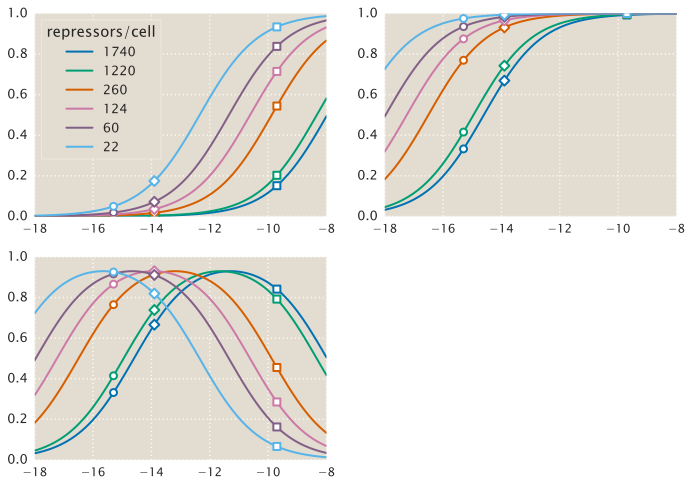

In [13]:
# Establish parameter values
K_A = 139
K_I = 0.53
e_AI = 4.5
Reps = np.array([1740, 1220, 260, 124, 60, 22])
op_array = np.linspace(-18, -8, 100)
O1 = -15.3
O2 = -13.9
O3 = -9.7
ops = [O1, O2, O3]
markers = ['o', 'D', 's']
ops_dict = dict(zip(ops, markers))

# Set color palette
colors = sns.color_palette('colorblind', n_colors=7)
colors[4] = sns.xkcd_palette(['dusty purple'])[0]

# Make plots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(11.5, 8))

for i in range(len(Reps)):
    ax1.plot(op_array, leakiness(K_A, K_I, e_AI, Reps[i], op_array), color=colors[i], label=Reps[i])
    ax2.plot(op_array, saturation(K_A, K_I, e_AI, Reps[i], op_array), color=colors[i])
    ax3.plot(op_array, dynamic_range(K_A, K_I, e_AI, Reps[i], op_array), color=colors[i])
    ax4.axis('off')
    
    for op in ops:
        ax1.plot(op, leakiness(K_A, K_I, e_AI, Reps[i], op), marker=ops_dict[op],
                 markerfacecolor='white', markeredgecolor=colors[i], markeredgewidth=2)
        ax2.plot(op, saturation(K_A, K_I, e_AI, Reps[i], op), marker=ops_dict[op],
                 markerfacecolor='white', markeredgecolor=colors[i], markeredgewidth=2)
        ax3.plot(op, dynamic_range(K_A, K_I, e_AI, Reps[i], op), marker=ops_dict[op],
                 markerfacecolor='white', markeredgecolor=colors[i], markeredgewidth=2)

leg = ax1.legend(loc='upper left', title='repressors/cell')
leg.get_title().set_fontsize(15)